In [4]:
url="https://raw.githubusercontent.com/Ashutoshrx/Machine-Learning/master/data/item_categories.csv"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
training_set = pd.read_csv(url)

In [7]:
training_set.shape

(84, 2)

In [8]:
training_set.head(5)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
training_set = training_set.iloc[:,1:3].values

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [14]:
rows=len(training_set)

In [15]:
X_train = training_set[0:rows-1]
y_train = training_set[1:rows]

In [16]:
X_train = np.reshape(X_train, (rows-1, 1, 1))

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [18]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, batch_size = 32, epochs = 1000)

Epoch 1/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1177
Epoch 2/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1153
Epoch 3/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1133
Epoch 4/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1114
Epoch 5/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1094
Epoch 6/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1079
Epoch 7/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1061
Epoch 8/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1046
Epoch 9/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1033
Epoch 10/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1019
Epoch 11/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1007
Epoch 12/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0997
Epoch 13/1000
3/3 [==============================

In [19]:
test_set = pd.read_csv(url)
rows=len(test_set)
real_value = test_set.iloc[:,1:3].values
inputs = real_value
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (rows, 1, 1))

In [20]:

predicted_value = regressor.predict(inputs)
predicted_value = sc.inverse_transform(predicted_value)

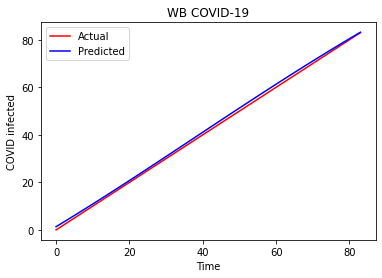

In [21]:
plt.plot(real_value, color = 'red', label = 'Actual')
#plt.set_size_inches(16,5)
plt.plot(predicted_value, color = 'blue', label = 'Predicted')
plt.title('WB COVID-19')
plt.xlabel('Time')
plt.ylabel('COVID infected')
plt.legend()

In [22]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(real_value,predicted_value)
from math import sqrt
rmse = sqrt(mse)
print("Mean Squared Error = ", mse)
print("Root Mean Squared Error = ", rmse)

Mean Squared Error =  1.049404535746479
Root Mean Squared Error =  1.0244044785857191


In [23]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
R2_score = r2_score(real_value, predicted_value)
print('R2 score: ', R2_score)

R2 score:  0.9982150454388437
